In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from datasets import load_dataset
import numpy as np

# Load the dataset
dataset = load_dataset("google-research-datasets/go_emotions", "simplified")

# Get labels
labels = dataset["train"].features["labels"].feature.names
id2label = {i: label for i, label in enumerate(labels)}
label2id = {label: i for i, label in enumerate(labels)}

def preprocess_data(examples):
    # Convert labels to a binary vector (One-Hot Encoding for Multi-label)
    batch_labels = []
    for labels_list in examples["labels"]:
        binary_labels = [0.0] * len(labels)
        for l in labels_list:
            binary_labels[l] = 1.0
        batch_labels.append(binary_labels)
    
    examples["label_vec"] = batch_labels
    return examples

dataset = dataset.map(preprocess_data, batched=True)

README.md: 0.00B [00:00, ?B/s]

simplified/train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

simplified/validation-00000-of-00001.par(…):   0%|          | 0.00/350k [00:00<?, ?B/s]

simplified/test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

# 1. Emotion Label Distribution (Bar Chart)

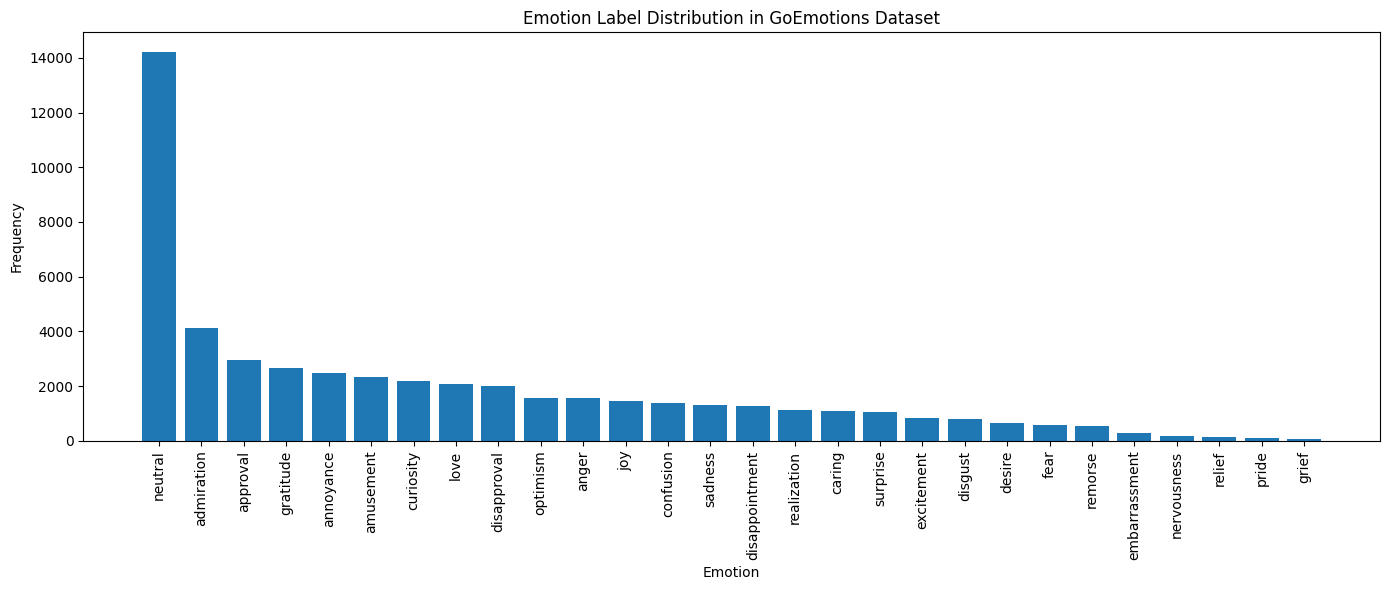

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Count emotion frequencies
label_counts = Counter()

for labels_list in dataset["train"]["labels"]:
    for l in labels_list:
        label_counts[id2label[l]] += 1

# Sort labels by frequency
labels_sorted = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
emotion_names, counts = zip(*labels_sorted)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(emotion_names, counts)
plt.xticks(rotation=90)
plt.title("Emotion Label Distribution in GoEmotions Dataset")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# 2. Number of Emotions per Text (Multi-Label Nature)

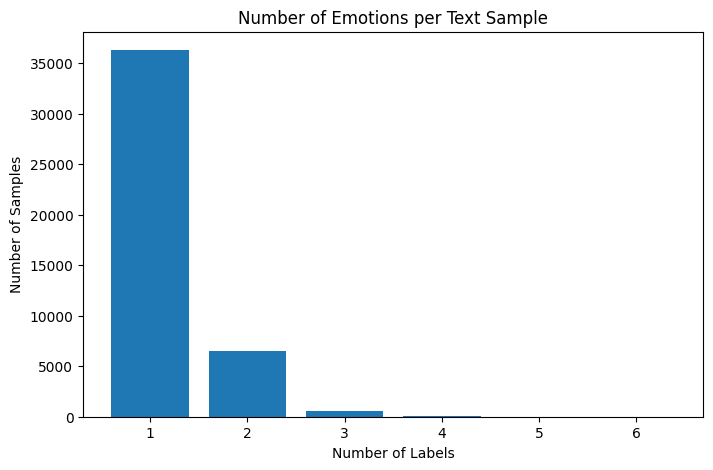

In [3]:
num_labels_per_sample = [len(l) for l in dataset["train"]["labels"]]

plt.figure(figsize=(8, 5))
plt.hist(num_labels_per_sample, bins=range(1, 8), align="left", rwidth=0.8)
plt.title("Number of Emotions per Text Sample")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Samples")
plt.xticks(range(1, 7))
plt.show()


# 3. Text Length Distribution

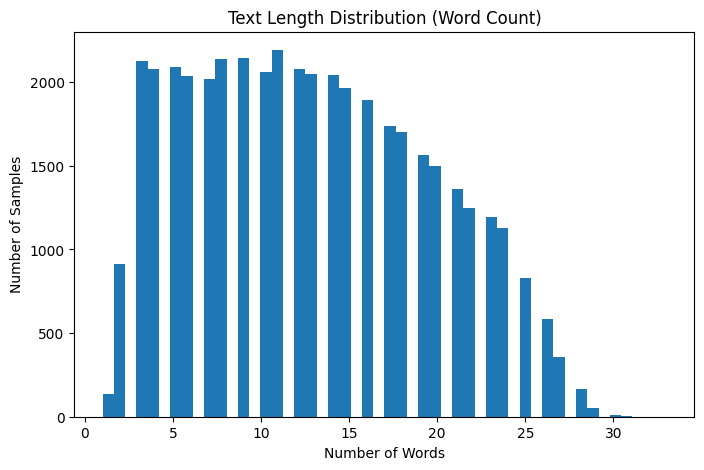

In [4]:
text_lengths = [len(text.split()) for text in dataset["train"]["text"]]

plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=50)
plt.title("Text Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Samples")
plt.show()


# 4. Top Emotions Co-Occurrence Heatmap (Advanced)

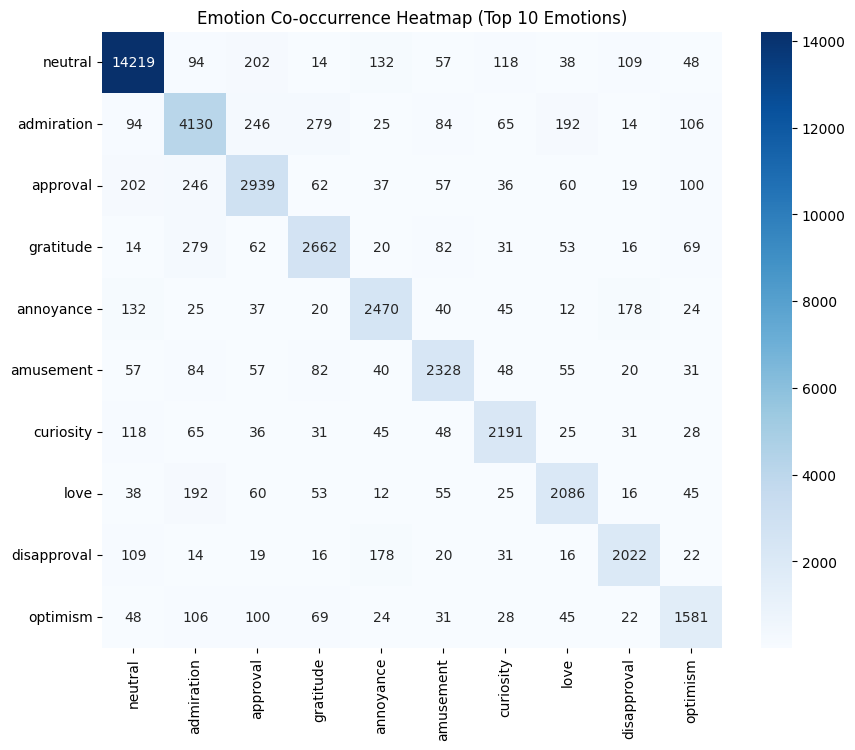

In [5]:
import seaborn as sns
import numpy as np

# Select top 10 emotions
top_emotions = [e for e, _ in labels_sorted[:10]]
top_indices = [label2id[e] for e in top_emotions]

# Co-occurrence matrix
co_matrix = np.zeros((10, 10))

for labels_list in dataset["train"]["labels"]:
    present = [i for i in labels_list if i in top_indices]
    for i in present:
        for j in present:
            co_matrix[top_indices.index(i)][top_indices.index(j)] += 1

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, xticklabels=top_emotions, yticklabels=top_emotions,
            annot=True, fmt=".0f", cmap="Blues")
plt.title("Emotion Co-occurrence Heatmap (Top 10 Emotions)")
plt.show()


# 5. Sample Inspection (Sanity Check)

In [6]:
for i in range(5):
    print("Text:", dataset["train"][i]["text"])
    print("Emotions:", [id2label[l] for l in dataset["train"][i]["labels"]])
    print("-" * 80)


Text: My favourite food is anything I didn't have to cook myself.
Emotions: ['neutral']
--------------------------------------------------------------------------------
Text: Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
Emotions: ['neutral']
--------------------------------------------------------------------------------
Text: WHY THE FUCK IS BAYLESS ISOING
Emotions: ['anger']
--------------------------------------------------------------------------------
Text: To make her feel threatened
Emotions: ['fear']
--------------------------------------------------------------------------------
Text: Dirty Southern Wankers
Emotions: ['annoyance']
--------------------------------------------------------------------------------
